<a href="https://colab.research.google.com/github/MittalNeha/similar_faces/blob/main/CelebA_faceSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MCNN model
This is the implementation of the paper "Attributes for Improved Attributes: A
Multi-Task Network for Attribute Classification" - 
Emily M. Hand and Rama Chellappa


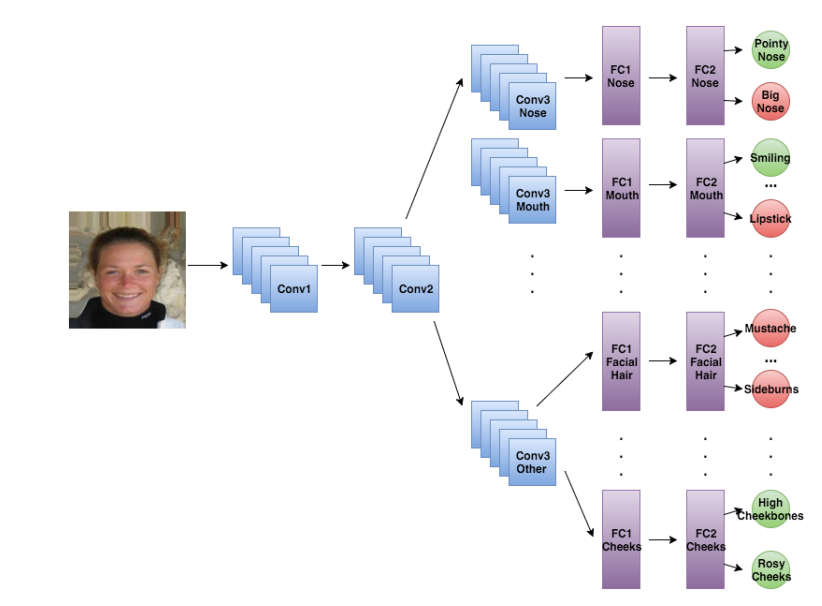


In [1]:
!git clone https://github.com/MittalNeha/similar_faces.git

In [2]:
import torch
import torchvision.transforms as transforms
from PIL import Image

import matplotlib.pyplot as plt

In [13]:
import similar_faces
from similar_faces import *
# from similar_faces import main
from similar_faces.dataset import FaceAttributesDataset

from similar_faces.main import attributes_model

from similar_faces import dataset
from similar_faces.similar_faces import FaceSimilarity

In [4]:
use_cuda = 1
device = torch.device("cuda" if use_cuda else "cpu")

## Get the dataset from Kaggle

In [5]:
! pip install -q kaggle

In [6]:
from google.colab import files
files.upload()

In [7]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip -q /content/celeba-dataset.zip 

#Analyse the datset

In [8]:
#Folder and image files
baseFolder = '/content/'
imgFolder = 'img_align_celeba/img_align_celeba'

visual_dataset = FaceAttributesDataset(baseFolder, imgFolder, 'list_attr_celeba.csv')

In [9]:
data = next(iter(visual_dataset))
print(data['image'])
print(data['attr'])

<PIL.Image.Image image mode=RGB size=227x227 at 0x7FD7F61A3450>
{'gender': [0.0], 'nose': [0.0, 1.0], 'mouth': [0.0, 1.0, 1.0, 1.0], 'eyes': [1.0, 0.0, 0.0, 0.0, 0.0], 'face': [1.0, 0.0, 0.0, 0.0, 1.0, 1.0], 'head': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'facial_hair': [0.0, 0.0, 1.0, 0.0, 0.0], 'cheeks': [1.0, 0.0], 'fat': [0.0, 0.0]}


Plot sample images from CelebA dataset

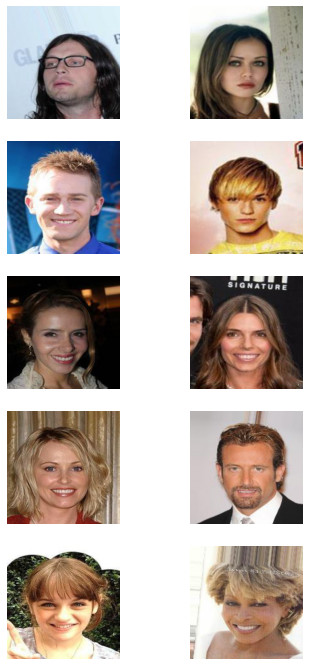

In [10]:
figure = plt.figure(figsize=(6, 12))
rows, cols = 5,2
inc = 100
for idx in range(1, cols * rows + 1):
    sample = visual_dataset[idx+inc]
    figure.add_subplot(rows,cols,idx)
    plt.imshow(sample['image'])
    plt.axis("off")
plt.show()

#Finding similar Faces

Train the MCNN model

In [11]:
net, hist = attributes_model()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/content/similar_faces/main.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  total_loss = torch.tensor(loss, requires_grad=True)  # sourceTensor.clone().detach().requires_grad_(True)


1: loss 6.386136054992676, acc 24.509437561035156
101: loss 6.3722453117370605, acc 25.373931884765625
201: loss 6.346044063568115, acc 27.41364097595215
301: loss 6.366735458374023, acc 25.37036895751953
401: loss 6.368362903594971, acc 25.625
501: loss 6.351484298706055, acc 26.73699951171875
601: loss 6.368113040924072, acc 27.56855583190918
701: loss 6.3791303634643555, acc 24.43999481201172
801: loss 6.3546953201293945, acc 28.60487937927246
901: loss 6.357912063598633, acc 27.83119773864746
1001: loss 6.35476541519165, acc 30.12553596496582
1101: loss 6.3506083488464355, acc 29.16844940185547
1201: loss 6.327580451965332, acc 25.642807006835938


Initialize the class for Face similarity

In [14]:
fs = FaceSimilarity(dataset.allAttributes)
print("Trained a w2v model of {} vector_size".format(fs.model.wv.vector_size))

Created a Word2Vec model
Train NearestNeighbors
Trained a w2v model of 100 vector_size


Load a test image and find 5 most similar images from the trainset

{'gender': tensor([[0.5852]], device='cuda:0', grad_fn=<SigmoidBackward>), 'nose': tensor([[0.5562, 0.5000]], device='cuda:0', grad_fn=<SigmoidBackward>), 'mouth': tensor([[0.5000, 0.5000, 0.5122, 0.5000]], device='cuda:0',
       grad_fn=<SigmoidBackward>), 'eyes': tensor([[0.5695, 0.5305, 0.5000, 0.5882, 0.5000]], device='cuda:0',
       grad_fn=<SigmoidBackward>), 'face': tensor([[0.5000, 0.5000, 0.5374, 0.5102, 0.5000, 0.5000]], device='cuda:0',
       grad_fn=<SigmoidBackward>), 'head': tensor([[0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
         0.5000, 0.5006, 0.5000, 0.5000]], device='cuda:0',
       grad_fn=<SigmoidBackward>), 'facial_hair': tensor([[0.5000, 0.5000, 0.5110, 0.5000, 0.5000]], device='cuda:0',
       grad_fn=<SigmoidBackward>), 'cheeks': tensor([[0.5000, 0.5000]], device='cuda:0', grad_fn=<SigmoidBackward>), 'fat': tensor([[0.5141, 0.5000]], device='cuda:0', grad_fn=<SigmoidBackward>)}
['Male', 'Big_Nose', 'Arched_Eyebrows', 'Bags_Un

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


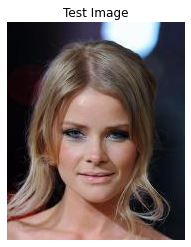

In [21]:
img_name = 'img_align_celeba/img_align_celeba/000010.jpg' #images for testing
test_image = Image.open(img_name)
#Test image
plt.title("Test Image")
plt.axis("off")
plt.imshow(test_image)

transform = transforms.Compose([
    # other transformations to be added in this list
    transforms.ToTensor()
])

test_image = test_image.resize((227,227))
test_image = transform(test_image)

test_out = net(test_image.unsqueeze(0).to(device))
print(test_out)
sim_images = fs.similar_faces(test_out, dataset.groups, 5)

Plot the similar faces

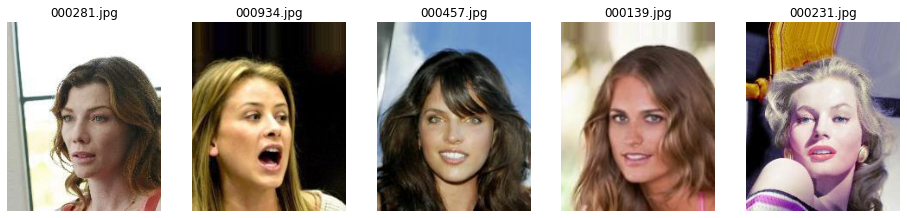

In [20]:
figure = plt.figure(figsize=(16, 12))
rows, cols = 1, len(sim_images)
for idx in range(1, cols * rows+1):
    sample = Image.open('/content/img_align_celeba/img_align_celeba/' + sim_images[idx-1])
    figure.add_subplot(rows,cols,idx)
    plt.imshow(sample)
    plt.title(sim_images[idx-1])
    plt.axis("off")
plt.show()

In [ ]:
# import importlib
# importlib.reload(similar_faces.similar_faces)